In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.interpolate import CubicHermiteSpline

In [26]:
df = pd.read_csv('amz.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,15.5775,15.6490,15.5005,15.5175,15.5175,40960000
1,2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2,2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
3,2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
4,2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000


In [27]:
df.shape
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,15.577500,15.649000,15.500500,15.517500,15.517500,40960000
1,2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2,2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
3,2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
4,2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
...,...,...,...,...,...,...,...
2326,2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500
2327,2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32611500
2328,2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,31046600
2329,2024-04-04,184.000000,185.100006,180.000000,180.000000,180.000000,41624300


In [28]:
tk = df['Date'][::80]

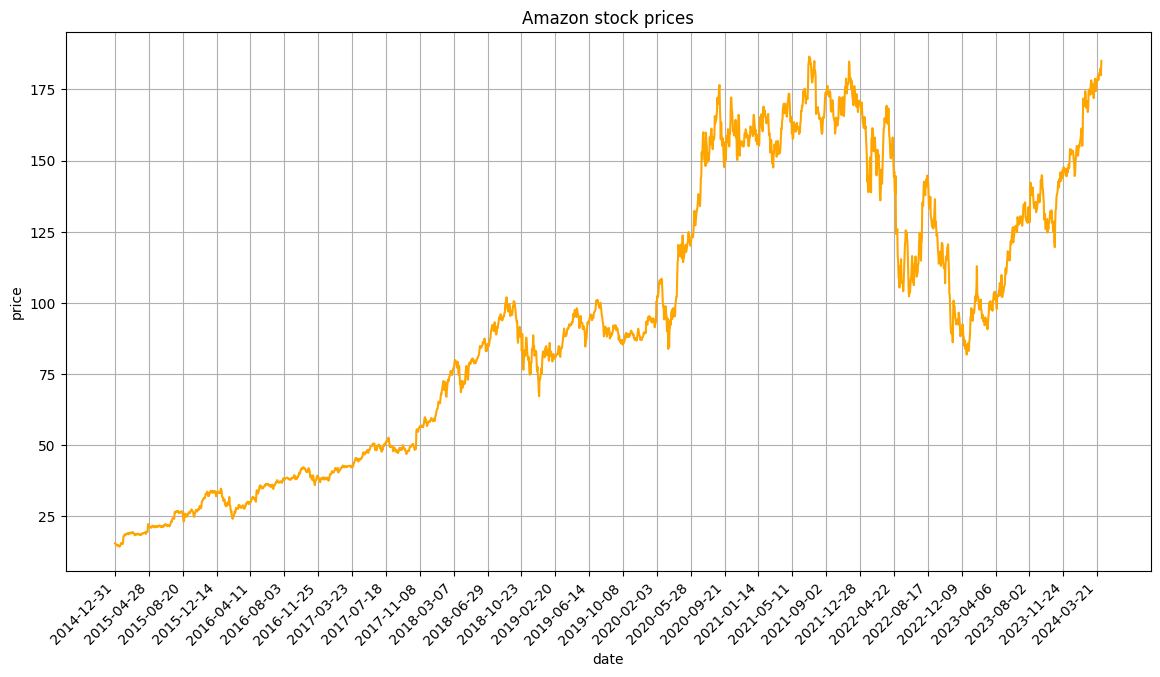

In [29]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df['Date'], df['Close'], color='orange')
ax.set_xlabel('date')
ax.set_ylabel('price')
ax.set_title('Amazon stock prices')

plt.xticks(tk, rotation=45, ha='right')
plt.grid()

plt.show()

In [30]:
sample_rate = 5

x_values = np.array(np.arange(0, 2331)[::sample_rate])
y_values = df['Close'][::sample_rate]

dydx = np.gradient(y_values)
x_interpolated = np.array(np.arange(0, 2331))

In [31]:
spline = CubicHermiteSpline(x_values, y_values, dydx)
y_interpolated = spline(x_interpolated)

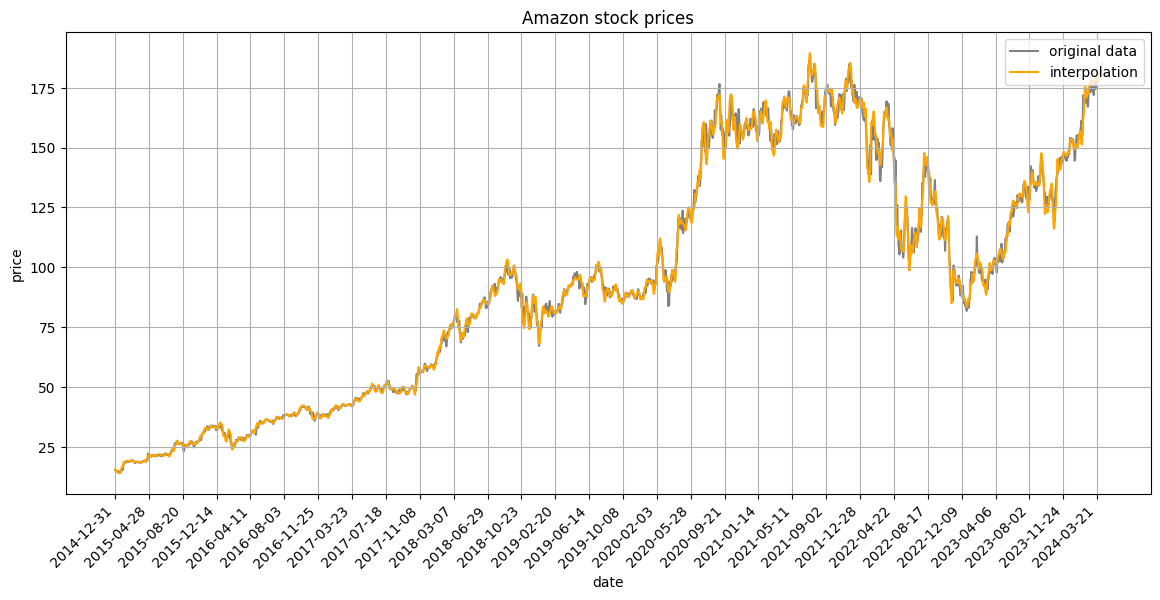

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['Date'], df['Close'], color='gray', zorder=0, label='original data')
ax.plot(x_interpolated[:len(y_interpolated)], y_interpolated[:len(y_interpolated)], color='orange', zorder=1, label='interpolation')
# ax.scatter(x_values, y_values, s=5, color='black', zorder=2, label='sampled data points')

ax.set_xlabel('date')
ax.set_ylabel('price')
ax.set_title('Amazon stock prices')
ax.legend(loc='upper right')

plt.xticks(tk, rotation=45, ha='right')
plt.grid()

plt.show()